# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [44]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
import numpy as np
from itertools import product
from sklearn.svm import SVC
def is_shattered(d, n, S_n):
    for labels in product(*([[0,1]]*n)):
        y = np.array(labels)
        if all(y) or not any(y):
            continue
        svm = SVC(C=10000, shrinking=False, kernel="linear", tol=1e-5)
        if not all(svm.fit(S_n,y).predict(S_n)==labels):
            return False
    return True

In [45]:
is_shattered(2, 4, [[0,0],[0,1],[1,0],[1,1]])

False

### c)

In [3]:
# there should be 2^n = 2^4 = 16 pictures - 2 (I dont consider all points in one class)

import matplotlib.pyplot as plt
def vis_is_shattered(d, n, S_n):
    for labels in product(*[[0,1]]*n):
        y = np.array(labels)
        if all(y) or not any(y):
            continue
        svm = SVC(C=10000, shrinking=False, kernel="linear", tol=1e-5)
        svm.fit(S_n,y)
        plt.scatter(np.array(S_n)[:,0],np.array(S_n)[:,1],c=labels)
        w = svm.coef_[0]
        b = svm.intercept_[0]
        x_points = np.linspace(0, 1)
        y_points = -(w[0] / w[1]) * x_points - b / w[1]
        plt.plot(x_points, y_points, c='r')
        plt.show()

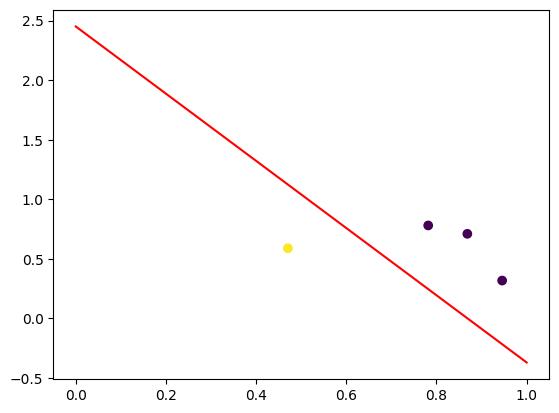

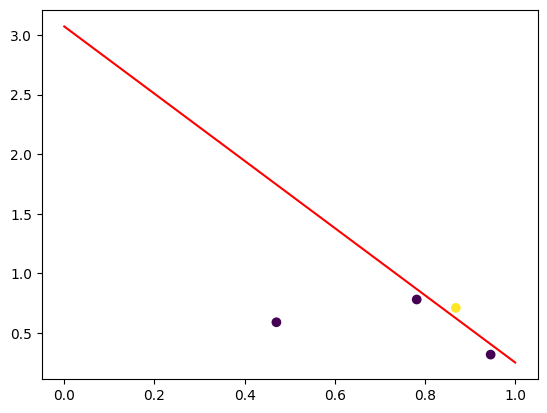

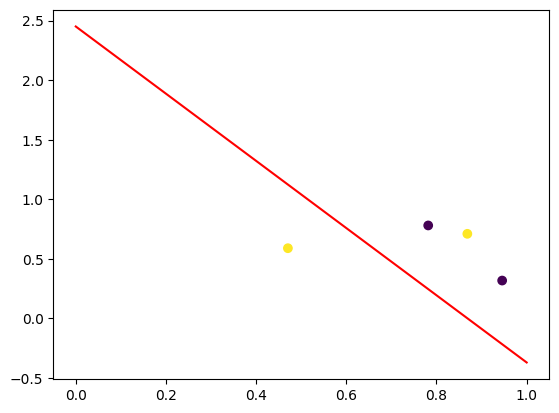

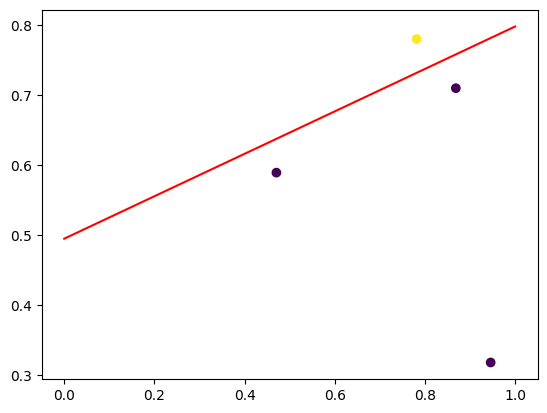

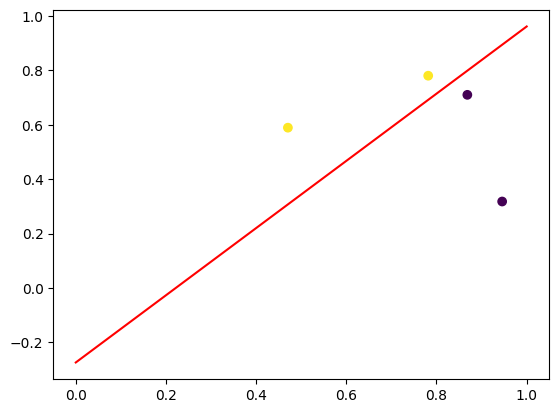

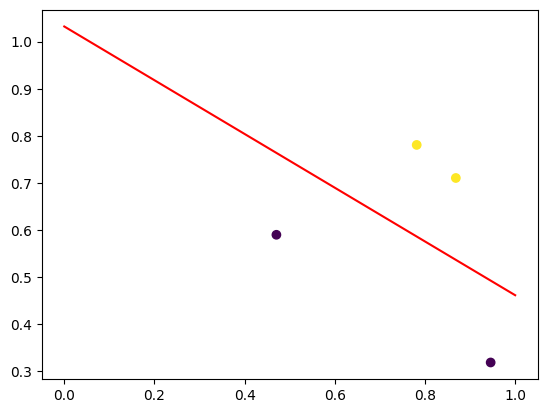

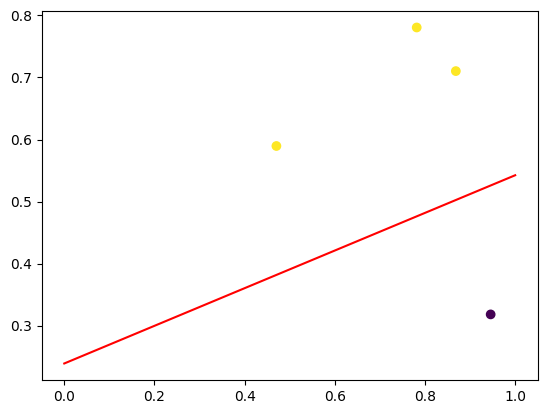

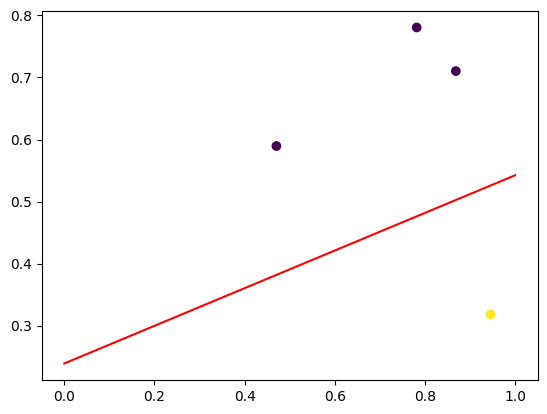

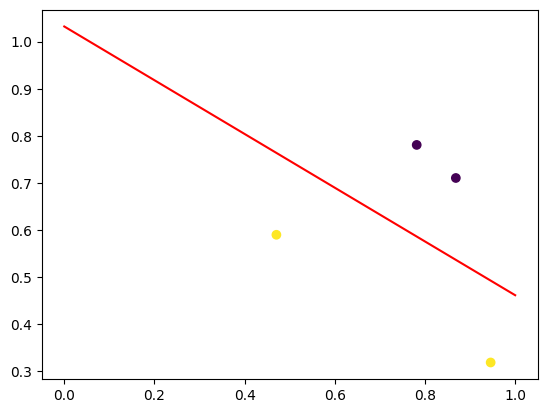

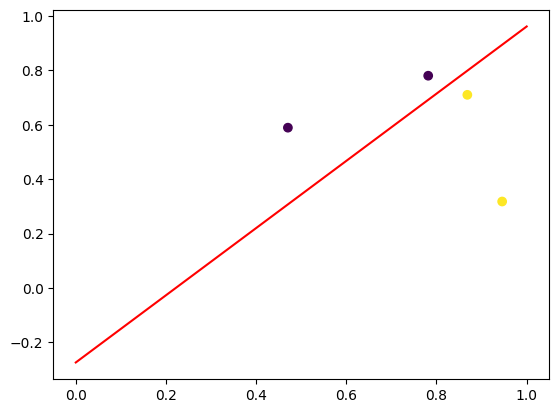

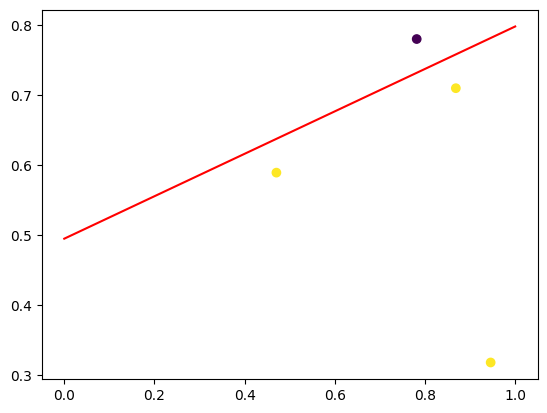

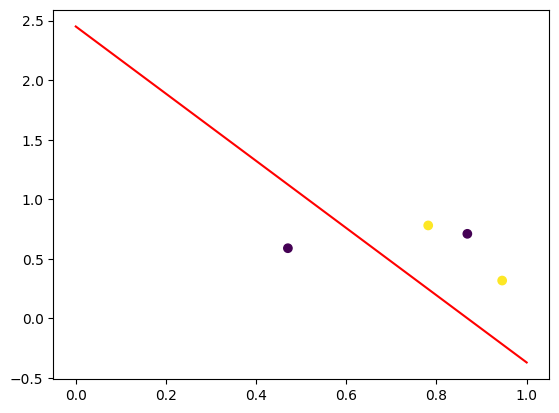

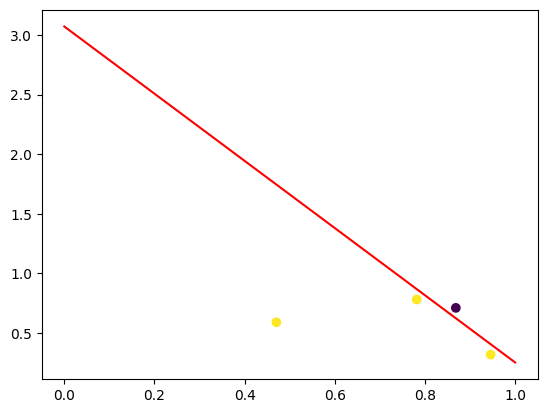

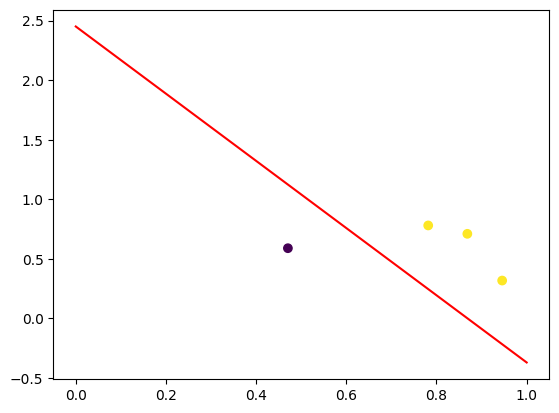

In [4]:
n=4
vis_is_shattered(2, n, np.random.uniform(0,1,(n,2)))

### d)

In [46]:
d = np.arange(2,11)
n = np.arange(2,14)
results = {d_i:0 for d_i in d}
f=False
for d_i in d:
    for n_i in n:
        if results[d_i]==n_i-1:
            break
        for i in range(50):
            bools = []
            S_n = np.random.normal(0,1,(n_i,d_i))
            res = is_shattered(d_i, n_i, S_n)
            bools.append(res)
            if res:
                break
        if any(bools):
            results[d_i]=n_i+1
print(results)

{2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10, 9: 11, 10: 12}


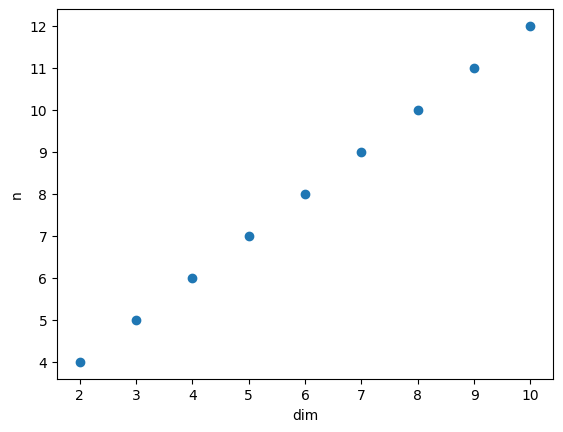

In [48]:
plt.scatter(results.keys(),results.values())
plt.xlabel("dim")
plt.ylabel("n")
plt.show()